In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#importing dependencies

In [107]:
class DataLoader:
    def __init__(self, file_path):
        self.data = pd.read_csv(file_path)
        self.data['position'] = 0 
        #initiaising the position column to 0

    def get_data(self):
        return self.data
    
    def plot_price(self):
        plt.figure(figsize=(12, 6))
        plt.plot(self.data['serial_num'], self.data['price'], label='Price', color='blue')
        plt.xlabel('Time Step')
        plt.ylabel('Price')
        plt.title('Price vs Time Step')
        plt.legend()
        plt.grid(True)
        plt.show()

Task 1:
Implementing the Static Threshold Strategy as mentioned in the problem statement.

In [108]:
class StaticThresholdStrategy:
    def __init__(self, build_threshold, liquidate_threshold):
        self.build_threshold = build_threshold
        self.liquidate_threshold = liquidate_threshold

    def apply_strategy(self, data):
        positions = []
        current_position = 0
        for alpha in data['alpha']:
            if current_position==0:
                if alpha>=self.build_threshold:
                    current_position=1
                elif alpha<=-self.build_threshold:
                    current_position=-1
            elif current_position==1:
                if alpha<=self.liquidate_threshold:
                    current_position=0
            elif current_position==-1:
                if alpha>=-self.liquidate_threshold:
                    current_position=0
            positions.append(current_position)
        data['position'] = positions
        return data

Task 2: Making a Backtesting Engine which returns a pnl column and the final total pnl for the given strategy and also plots the pnl with time.

In [109]:
class BacktestingEngine:
    def __init__(self,data):
        self.data=data
    def calculate_pnl(self):
        pnl = [0]
        current_pnl=0
        for i in range(1, len(self.data)):
            current_pnl+=self.data.loc[i-1,'position']*(self.data.loc[i,'price']-self.data.loc[i-1,'price'])
            pnl.append(current_pnl)
        self.data['pnl']=pnl
        return current_pnl,self.data
    def plot_pnl(self):
        plt.figure(figsize=(12, 6))
        plt.plot(self.data['serial_num'], self.data['pnl'], label='PnL', color='blue')
        plt.xlabel('Time Step')
        plt.ylabel('PnL')
        plt.title('PnL vs Time Step')
        plt.legend()
        plt.grid(True)
        plt.show()

Task 3: Building a Threshold Optimizer which does a grid search in the ranges provided for the best build,liquidate thresholds for a static threshold strategy and returns the best thresholds,best pnl and plots the pnl corresponding to the strategy with the best thresholds

In [110]:
class ThresholdOptimizer:
    def __init__(self, data):
        self.data = data
        self.optimal_pnl_data=data

    def optimize_thresholds(self, threshold_range, step_size):
        best_pnl = float('-inf')
        best_thresholds = (0, 0)
        for build_threshold in np.arange(threshold_range[0], threshold_range[1], step_size):
            for liquidate_threshold in np.arange(threshold_range[0], threshold_range[1], step_size):
                strategy = StaticThresholdStrategy(build_threshold, liquidate_threshold)
                strategy_data = strategy.apply_strategy(self.data.copy())
                engine = BacktestingEngine(strategy_data)
                pnl,pnl_data = engine.calculate_pnl()
                if pnl > best_pnl:
                    best_pnl = pnl
                    best_pnl_data=pnl_data
                    best_thresholds = (build_threshold, liquidate_threshold)
        self.optimal_pnl_data=best_pnl_data
        return best_thresholds, best_pnl, best_pnl_data
    def plot_pnl(self):
        plt.figure(figsize=(12, 6))
        plt.plot(self.optimal_pnl_data['serial_num'], self.optimal_pnl_data['pnl'], label='PnL', color='blue')
        plt.xlabel('Time Step')
        plt.ylabel('PnL')
        plt.title('PnL vs Time Step')
        plt.legend()
        plt.grid(True)
        plt.show()


loading the data

In [111]:
data_loader=DataLoader('asset_1.csv')
data=data_loader.get_data()
data.head()

,serial_num,price,alpha,position
0,0,18105.30078,0.000000,0
1,1,18398.96061,-0.630291,0
2,2,18204.93954,-0.123420,0
3,3,18339.35778,-0.240239,0
4,4,18578.08480,-0.612625,0


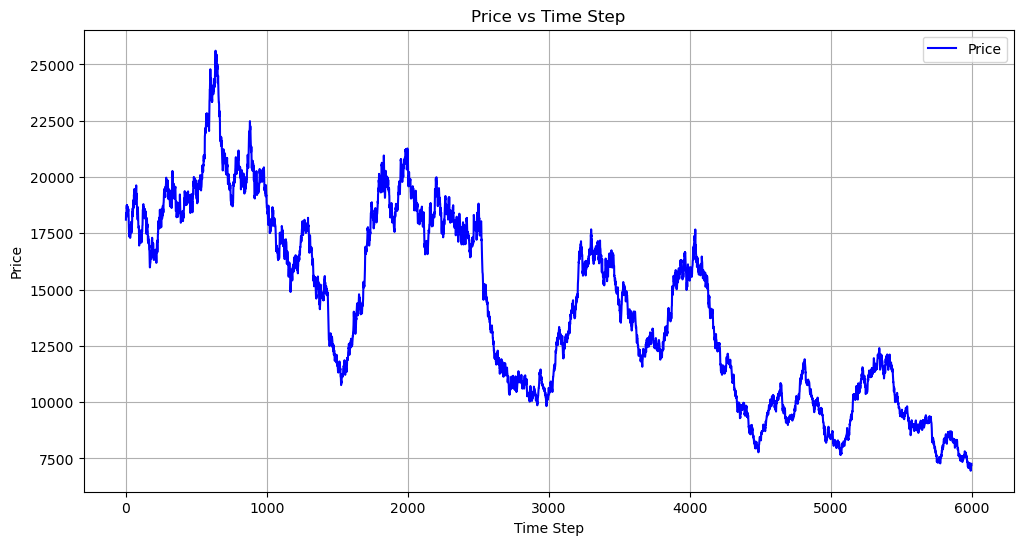

In [112]:
data_loader.plot_price()

Applying the strategy for Task1

In [113]:
strategy=StaticThresholdStrategy(build_threshold=0.6,liquidate_threshold=0.2)
strategy_data=strategy.apply_strategy(data)
strategy_data.head()

,serial_num,price,alpha,position
0,0,18105.30078,0.000000,0
1,1,18398.96061,-0.630291,-1
2,2,18204.93954,-0.123420,0
3,3,18339.35778,-0.240239,0
4,4,18578.08480,-0.612625,-1


Calculating the pnl for our strategy using the backtesting engine as in Task 2

In [114]:
backeng=BacktestingEngine(strategy_data)
pnl,pnl_data=backeng.calculate_pnl()
print("final pnl:",pnl)
pnl_data.head()

final pnl: 26250.88133200005


,serial_num,price,alpha,position,pnl
0,0,18105.30078,0.000000,0,0.00000
1,1,18398.96061,-0.630291,-1,0.00000
2,2,18204.93954,-0.123420,0,194.02107
3,3,18339.35778,-0.240239,0,194.02107
4,4,18578.08480,-0.612625,-1,194.02107


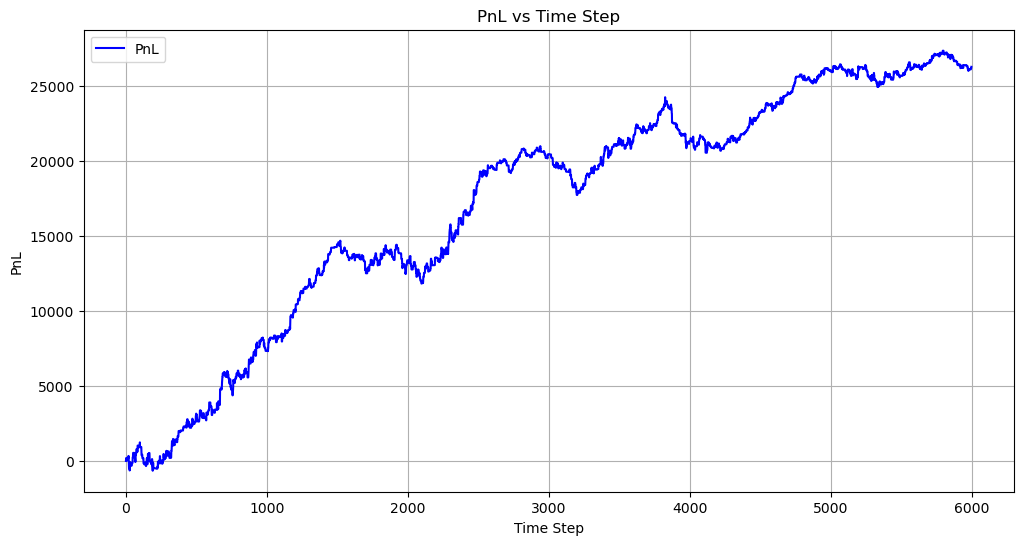

In [115]:
backeng.plot_pnl()

Optimizing the static thresholds using a Threshold optimizer as in Task 3

In [116]:
optimizer=ThresholdOptimizer(data)
optimal_thresholds,optimal_pnl,optimal_pnl_data=optimizer.optimize_thresholds([0,0.8],0.05)
print("optimal build threshold:",optimal_thresholds[0])
print("optimal liquidate threshold:",optimal_thresholds[1])
print("optimal pnl:",optimal_pnl)

optimal build threshold: 0.15000000000000002
optimal liquidate threshold: 0.05
optimal pnl: 32454.266442000026


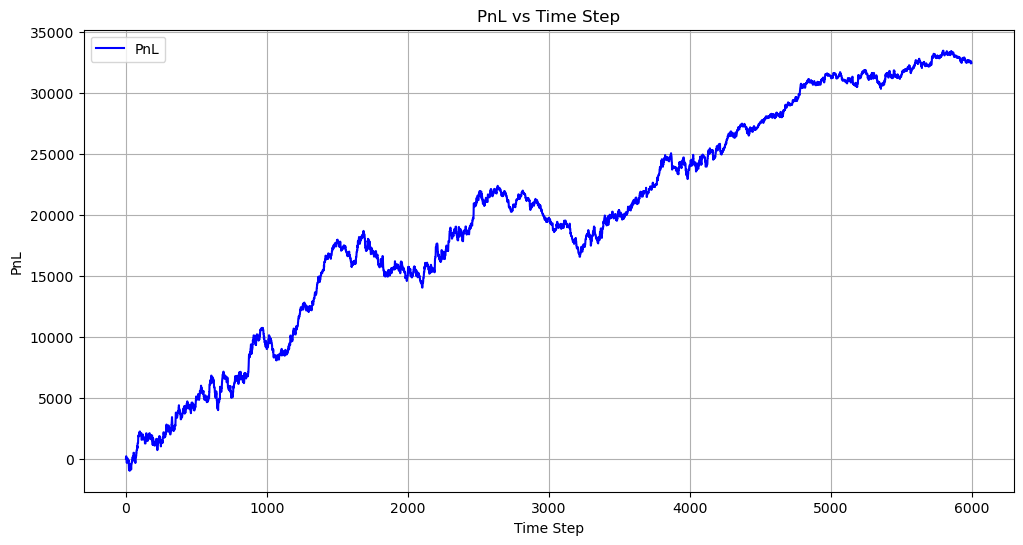

In [117]:
optimizer.plot_pnl()